### Real Estate Price Prediction
Geekbrains AI/BigData Python for Data Science course competition

Непосредственно код.

In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format ='svg'

In [29]:
train = pd.read_csv(r"C:\Users\dm-k2\PycharmProjects\1\Lesson\Numpy-pandas\Course_project\train.csv")

In [30]:
test = pd.read_csv(r"C:\Users\dm-k2\PycharmProjects\1\Lesson\Numpy-pandas\Course_project\test.csv")

In [31]:
train.corr()['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.550291
Square           0.520075
DistrictId       0.265100
Social_1         0.263286
Helthcare_2      0.253090
Social_2         0.239226
Shops_1          0.180876
Healthcare_1     0.138755
Floor            0.128715
HouseFloor       0.088280
LifeSquare       0.081292
Social_3         0.074878
KitchenSquare    0.028864
Id               0.009880
HouseYear        0.004305
Ecology_1       -0.058381
Name: Price, dtype: float64

Text(0, 0.5, 'Amount')

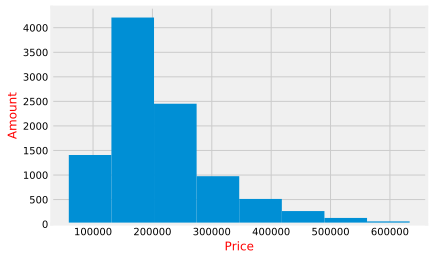

In [32]:
plt.hist(train['Price'], bins = 8)
plt.xlabel('Price', c = 'red')
plt.ylabel('Amount', c = 'red')

In [33]:
# Выделяем целевую переменную

price = train['Price']
train = train.drop(columns = 'Price')

In [34]:
# Преобразуем категориальные переменные в тип int

train['Ecology_2'] = (train['Ecology_2'] == 'A').astype(int)
train['Ecology_3'] = (train['Ecology_1'] == 'A').astype(int)
train['Shops_2'] = (train['Shops_2'] == 'A').astype(int)
test['Ecology_2'] = (test['Ecology_2'] == 'A').astype(int)
test['Ecology_3'] = (test['Ecology_1'] == 'A').astype(int)
test['Shops_2'] = (test['Shops_2'] == 'A').astype(int)

In [35]:
# Удаляем столбцы в test и train

train = train.drop(columns = ['Healthcare_1', 'LifeSquare'], axis = 1)
test = test.drop(columns = ['Healthcare_1', 'LifeSquare'], axis = 1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, price, test_size=0.25,random_state = 50)

In [38]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

In [42]:
# Учебная модель 

rf = RandomForestRegressor(n_estimators =300,max_depth =21,n_jobs = 2, max_features = 7,random_state = 100)
rf_train = rf.fit(X_train, y_train)
y_pred = rf_train.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7632008687439189

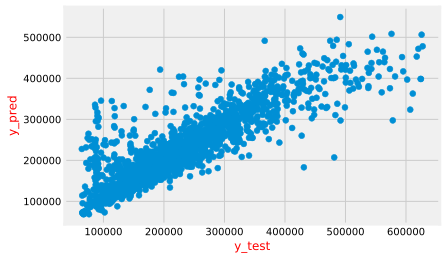

In [43]:
plt.scatter(y_test,y_pred )
plt.xlabel('y_test', c = 'red')
plt.ylabel('y_pred', c = 'red')
plt.show()

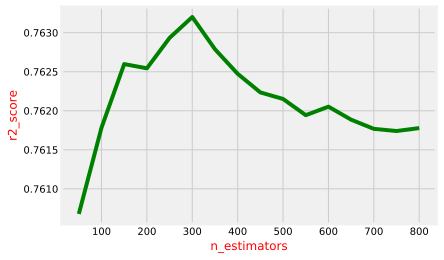

,n_estimators,r2_score
0,50,0.760678
1,100,0.761783
2,150,0.762598
3,200,0.762544
4,250,0.762934
5,300,0.763201
6,350,0.762788
7,400,0.762474
8,450,0.762235
9,500,0.762151


In [45]:
# Влияние n_estimators

X = []
Y = []
for num in range(50, 850, 50):
    model_f = RandomForestRegressor(n_estimators =num, max_depth =21,n_jobs = 2, max_features =7, random_state = 100)
    model_f = model_f.fit(X_train, y_train)
    y_pred = model_f.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    X.append(num)
    Y.append(r2)

    
    
plt.plot(X, Y, c = 'green')
plt.xlabel('n_estimators', c = 'red')
plt.ylabel('r2_score',c = 'red' )
plt.show()
pd.DataFrame({'n_estimators': X,'r2_score': Y}, columns =['n_estimators','r2_score'])

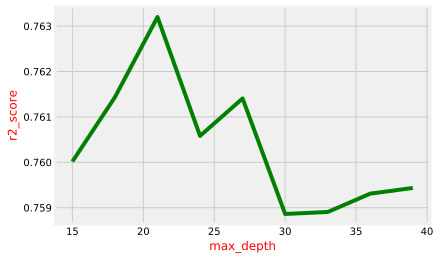

,max_depth,r2_score
0,15,0.760017
1,18,0.761435
2,21,0.763201
3,24,0.760582
4,27,0.761406
5,30,0.758862
6,33,0.758905
7,36,0.759310
8,39,0.759435


In [46]:
# Влияние max_depth
X = []
Y = []
for num in range(15, 40, 3):
    model_f = RandomForestRegressor(n_estimators =300, max_depth = num,n_jobs = 2, max_features = 7, random_state = 100)
    model_f = model_f.fit(X_train, y_train)
    y_pred = model_f.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    X.append(num)
    Y.append(r2)

    
    
plt.plot(X, Y, c = 'green')
plt.xlabel('max_depth', c = 'red')
plt.ylabel('r2_score', c = 'red')
plt.show()
pd.DataFrame({'max_depth ': X,'r2_score': Y}, columns =['max_depth ','r2_score'])

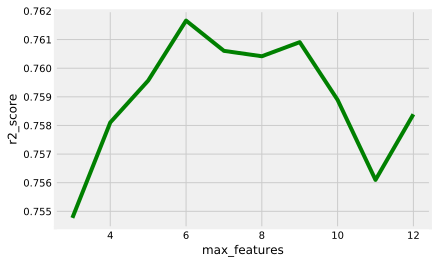

,max_features,r2_score
0,3,0.754771
1,4,0.758105
2,5,0.759567
3,6,0.761664
4,7,0.760606
5,8,0.760418
6,9,0.760911
7,10,0.758893
8,11,0.756098
9,12,0.758390


In [48]:
# Влияние max_features

X = []
Y = []
for num in range(3, 13):
    model_f = RandomForestRegressor(n_estimators =300, max_depth = 21,n_jobs = 2, max_features = num, random_state = 50)
    model_f = model_f.fit(X_train, y_train)
    y_pred = model_f.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    X.append(num)
    Y.append(r2)

    
    
plt.plot(X, Y, c = 'green')
plt.xlabel('max_features')
plt.ylabel('r2_score')
plt.show()
pd.DataFrame({'max_features': X,'r2_score': Y}, columns =['max_features','r2_score'])

In [50]:
# Итоговый вариант 

rf_res = rf.fit(train, price)
y_pred_k = rf_res.predict(test)
price_pred= pd.DataFrame({'Id':test['Id'], 'Price': y_pred_k}, )
price_pred.to_csv(r"C:\Users\dm-k2\PycharmProjects\1\Lesson\Numpy-pandas\Course_project\kornev_dmitriy_predictions.csv", index=False)